# Experimentación

In [2]:
%load_ext autoreload
%autoreload 2

In [60]:
import main
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
cake_size = 100
num_iters = 1000
debug = False

In [62]:
vals = main.flavor_valuation_identity()

infos = [main.P1_INFO_INCOMPLETE, main.P1_INFO_COMPLETE]

valuations = [
    main.flavor_valuation_identity(),
    main.flavor_valuation_inverse(),
    main.flavor_valuation_inverse_disjoint(),
    main.flavor_valuation_igual_picky(),
]

all_pairs = []
for info in infos:
    for val in valuations:
        all_pairs.append((info, val))

In [63]:
records = []
for info, val in tqdm(all_pairs):
    game = main.CutAndChoose(debug=debug, vals=val, quiet=True, p1_info=info)
    r = game.play(cake_size, num_iters)
    records.extend(r)

df = pd.DataFrame()
df = df.from_records(records)
print("Finished!")

Finished!


In [64]:
df.to_csv("results.csv")

In [65]:
#df = pd.read_csv("results.csv")

In [66]:
df_complete = df[(df["p1_info"] ==main.P1_INFO_COMPLETE)]

<AxesSubplot:xlabel='cut', ylabel='Count'>

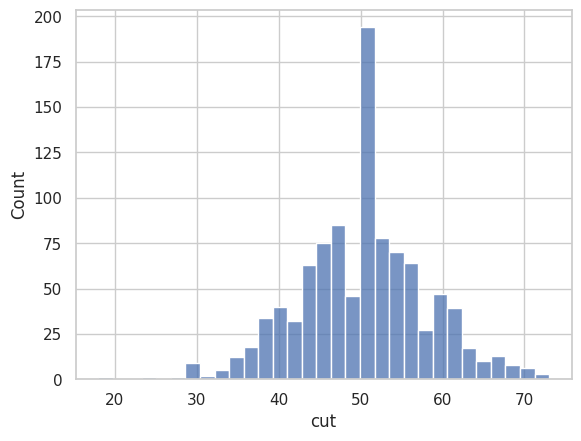

In [85]:
g = sns.FacetGrid(df_complete, col="val")
g.map(sns.histplot, "cut")
# sns.histplot(data=df_complete, x="cut", hue="val")
sns.histplot(data=df_complete[df_complete["val"]=="todo_v_picky"], x="cut")

In [9]:
df_complete

,p1,p2,val,p1_info,cut,iter,p1_total,p2_total
4000,0.496063,0.503937,identidad,complete,49,0,0.496063,0.503937
4001,0.498008,0.501992,identidad,complete,48,1,0.994071,1.005929
4002,0.497908,0.502092,identidad,complete,50,2,1.491979,1.508021
4003,0.493450,0.506550,identidad,complete,54,3,1.985429,2.014571
4004,0.498039,0.501961,identidad,complete,51,4,2.483468,2.516532
...,...,...,...,...,...,...,...,...
7995,0.500000,0.526316,igual_vs_picky,complete,50,995,552.340000,524.625018
7996,0.570000,0.545455,igual_vs_picky,complete,57,996,552.910000,525.170473
7997,0.530000,0.520000,igual_vs_picky,complete,47,997,553.440000,525.690473
7998,0.520000,0.516129,igual_vs_picky,complete,52,998,553.960000,526.206602


In [67]:
# https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn
df_totals = df_complete[["p1_total", "p2_total", "val", "iter"]]
df_melt = df_totals.melt(["val", "iter"], var_name="jugador", value_name="total")

In [89]:
df_totals = df[["p1_total", "p2_total", "val", "iter", "p1_info"]]
df_melt = df_totals.melt(["val", "iter", "p1_info"], var_name="jugador", value_name="total")

In [90]:
df_melt

,val,iter,p1_info,jugador,total
0,identidad,0,incomplete,p1_total,0.496063
1,identidad,1,incomplete,p1_total,0.996063
2,identidad,2,incomplete,p1_total,1.496063
3,identidad,3,incomplete,p1_total,1.988371
4,identidad,4,incomplete,p1_total,2.486410
...,...,...,...,...,...
15995,igual_vs_picky,995,complete,p2_total,525.984339
15996,igual_vs_picky,996,complete,p2_total,526.534339
15997,igual_vs_picky,997,complete,p2_total,527.056079
15998,igual_vs_picky,998,complete,p2_total,527.577818


Text(0.5, 0.98, 'Ganancia total en cada iteración\npara cada tipo de valuación')

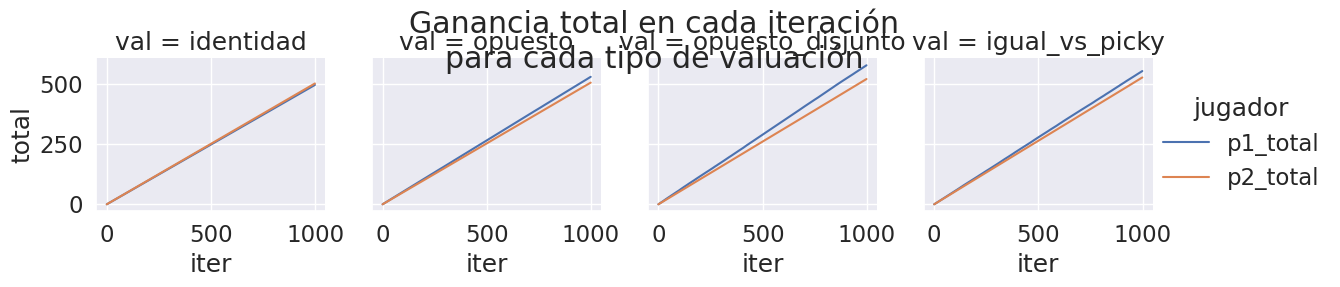

In [69]:
g = sns.FacetGrid(df_melt, col="val", hue="jugador")
g.map(sns.lineplot, "iter", "total")
g.add_legend()
g.fig.suptitle("Ganancia total en cada iteración\npara cada tipo de valuación")
#sns.pointplot(data=df_melt, x="iter", y="total", hue="jugador", col="val")
#sns.relplot(data=df_melt, x="iter", y="total", hue="jugador", col="val")

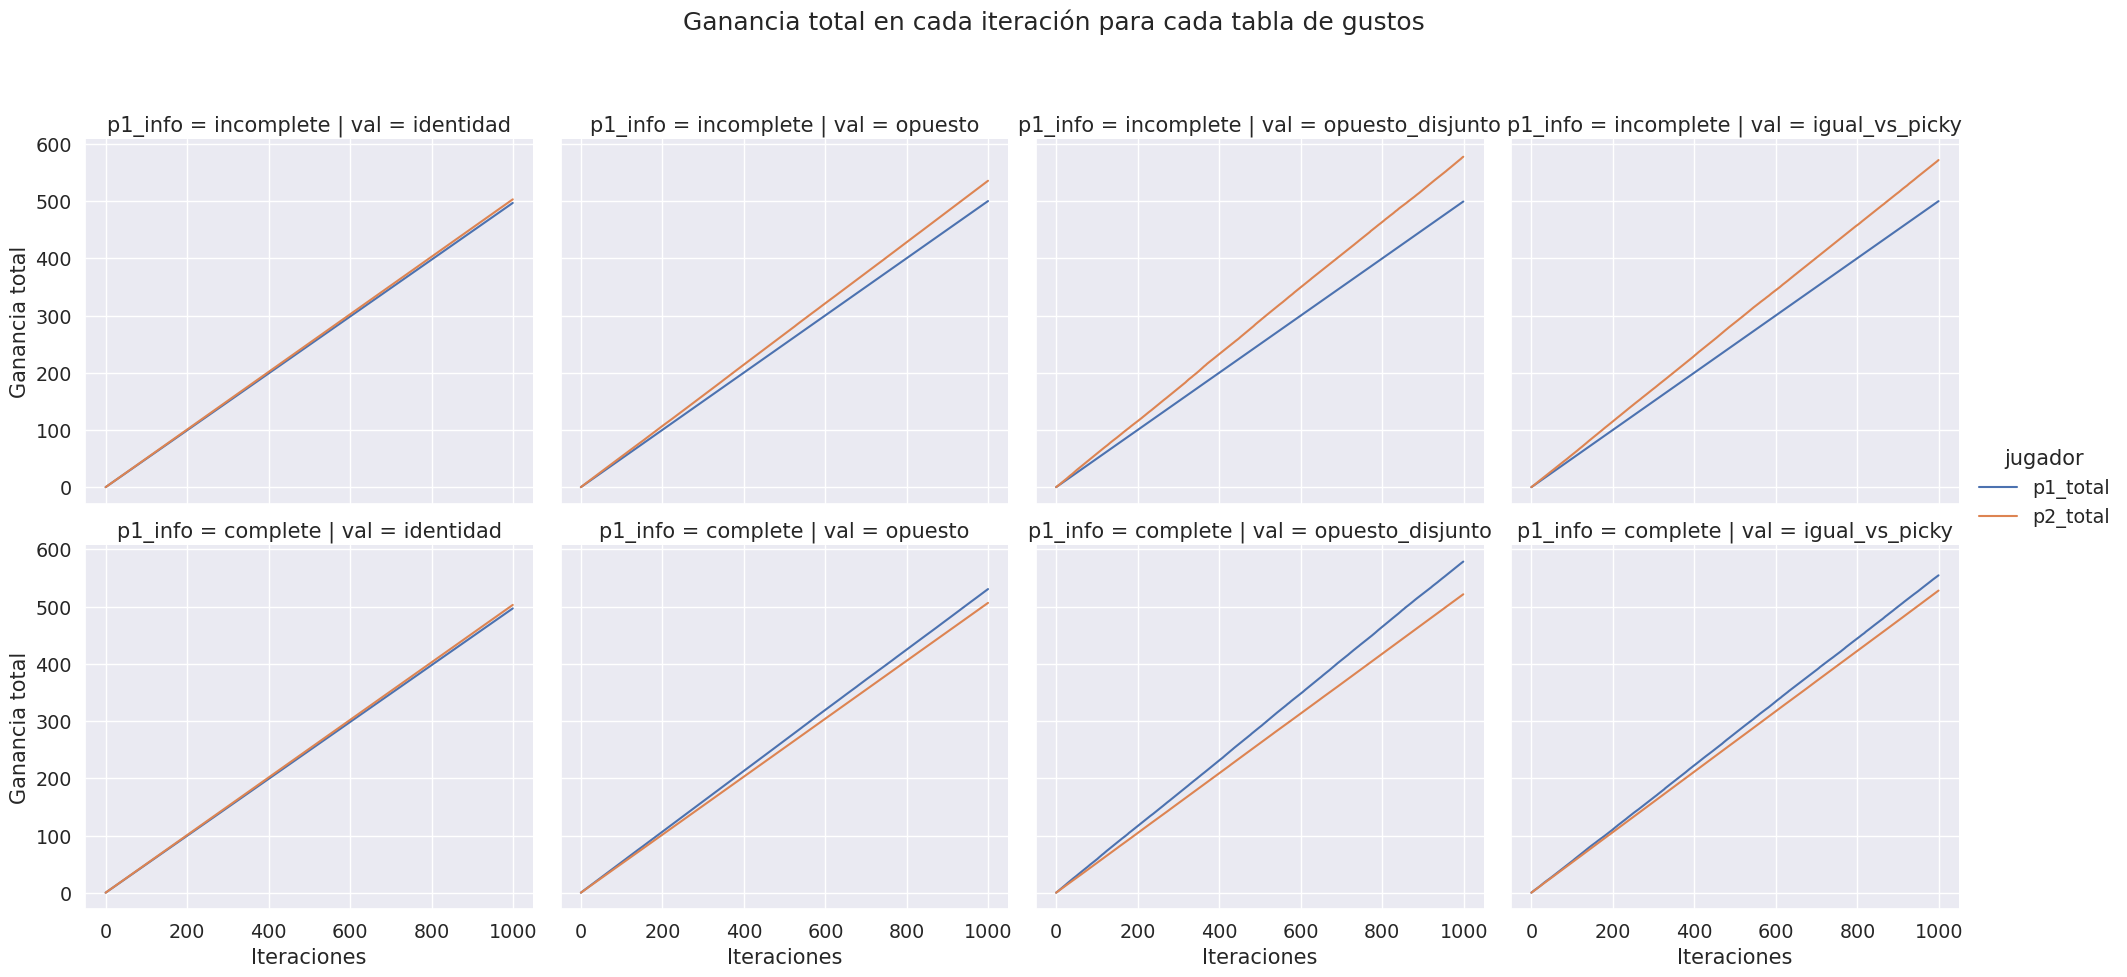

In [102]:
sns.set(font_scale=1.25)
rp = sns.relplot(data=df_melt, x="iter", y="total", hue="jugador", col="val", row="p1_info", kind="line")
rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle("Ganancia total en cada iteración para cada tabla de gustos")
rp.set_xlabels("Iteraciones")
rp.set_ylabels("Ganancia total")
plt.savefig("img/ganancia-total-iters.png")

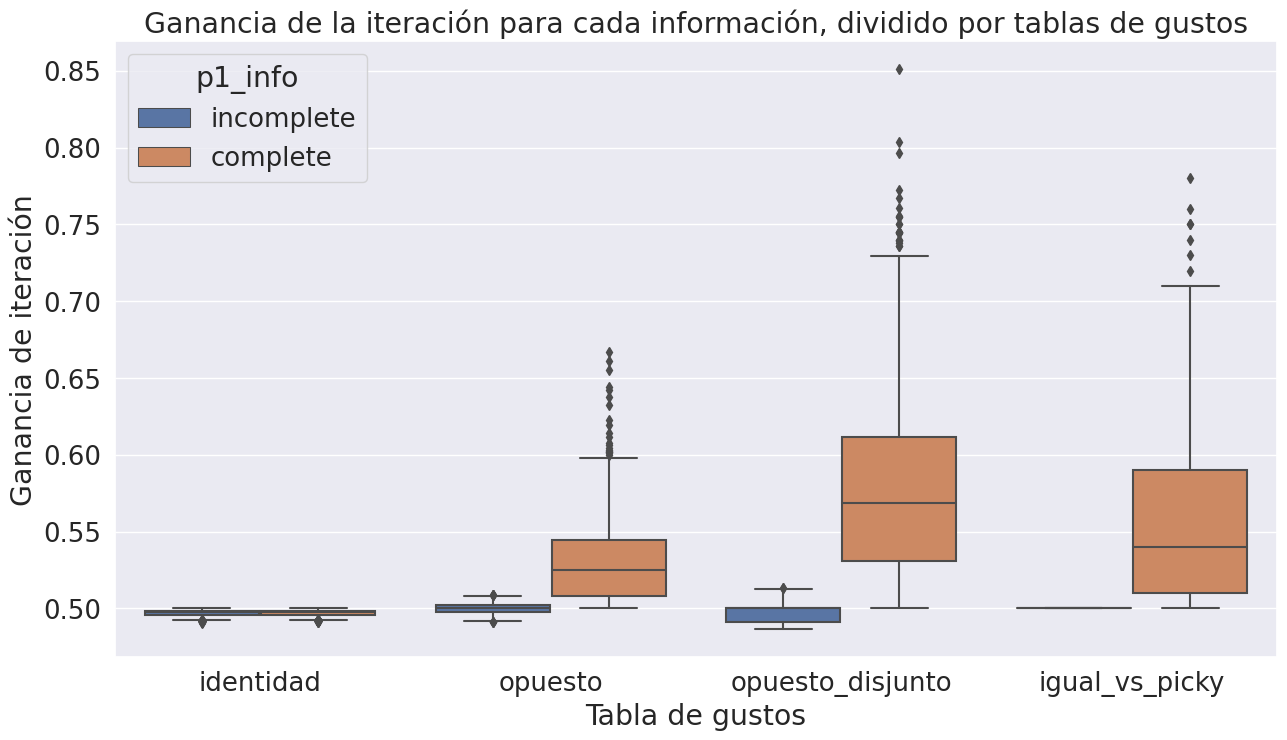

In [86]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df, x="val", y="p1", hue="p1_info")
ax.set(xlabel='Tabla de gustos', ylabel='Ganancia de iteración', title="Ganancia de la iteración para cada información, dividido por tablas de gustos")
plt.savefig("img/ganancia-iter.png")
#ax.set(ylim=(0, 1))
# TODO: Cambiar nombres a los ejes